# Tech Challenge - Fase 1: Análise Preditiva de Diabetes

## Introdução

### 🎯 **Objetivo do Projeto**:

Desenvolver um modelo de Machine Learning que estime a probabilidade de um paciente apresentar diabetes, com base em variáveis clínicas e fisiológicas. O propósito é apoiar o diagnóstico precoce, contribuindo para o tratamento preventivo e a melhoria da qualidade de vida dos pacientes.

### 📌 Problema de Negócio:

O diabetes é uma condição crônica que pode levar a complicações severas se não diagnosticada e tratada a tempo. O desenvolvimento de um sistema preditivo pode auxiliar na triagem de pacientes em risco, otimizando a priorização de atendimentos e o uso de recursos médicos, sobretudo em contextos de alta demanda.

### 📊 Dataset:

Foi utilizado o [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data) do [Kaggle](https://www.kaggle.com), amplamente adotado em benchmarks de classificação. Ele contém dados de pacientes do sexo feminino, com mais de 21 anos, da etnia Pima (grupo indígena norte-americano), o que pode implicar em viés populacional, exigindo cuidado ao generalizar os resultados para outras populações.

### 🧪 Metodologia:

**1 - Análise e Limpeza dos Dados:**
Verificação de valores ausentes, inconsistentes (como zeros em variáveis clínicas) e preparação do dataset para modelagem.

**2 - Análise Exploratória de Dados (EDA):**
Visualizações para explorar correlações, distribuição de variáveis, e sua relação com o desfecho (presença de diabetes).

**3 - Pré-processamento e Modelagem:**
Aplicação de técnicas de normalização, tratamento de desbalanceamento de classes, divisão em conjuntos de treino e teste, e treinamento de modelos de classificação.

**4 - Avaliação e Interpretação:**
Uso de métricas como AUC, F1-score e matriz de confusão para avaliar a performance, com análise interpretativa para extração de insights.

## 1. Importação das Bibliotecas

Importar bibliotecas é uma etapa crucial e deve ser feita de forma organizada, categorizando-as por tipo:

In [1]:
# Importação das bibliotecas essenciais para análise e visualização de dados

# pandas e numpy: manipulação e análise de dados
import pandas as pd
import numpy as np

# matplotlib e seaborn: visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

## 2. Carregamento e Análise Inicial dos Dados

Nesta etapa realizamos o carregamento dos dados e executamos análises preliminares para entender sua estrutura, possíveis inconsistências e características estatísticas gerais. Essa é uma prática fundamental para nortear as próximas fases do projeto.

Esta seção permanece a mesma. Carregamos os dados e exploramos suas características, confirmando o desbalanceamento das classes.

In [2]:
# Para executar no Colab, primeiro faça o upload do arquivo 'heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/src/diabetes.csv')
print("\nPrimeiras 5 linhas do dataset:")
display(df.head())


Primeiras 5 linhas do dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


| Coluna                    | Descrição                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Pregnancies               | Número de vezes que a paciente esteve grávida.                                                                            |
| Glucose                   | Concentração de glicose no plasma 2 horas após um teste oral de tolerância à glicose.                                     |
| BloodPressure             | Pressão arterial diastólica (mm Hg).                                                                                      |
| SkinThickness             | Espessura da dobra cutânea do tríceps (mm).                                                                               |
| Insulin                   | Nível de insulina no soro após 2 horas (mu U/ml).                                                                         |
| BMI                       | Índice de Massa Corporal (calculado como peso em kg / (altura em m)²).                                                    |
| DiabetesPedigreeFunction  | Função de pedigree de diabetes, que representa uma pontuação da probabilidade de diabetes com base no histórico familiar. |
| Age                       | Idade da paciente (em anos).                                                                                              |
| Outcome **(Alvo)**        | Variável alvo que indica o diagnóstico (0 = Não Diabético, 1 = Diabético).                                                |

In [3]:
df.shape

(768, 9)

Neste dataset temos 768 linhas e 9 colunas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


🔢 Tamanho do Dataset:
O dataset contém **768 registros e 9 variáveis**. Esse volume é considerado moderado para tarefas de classificação supervisionada. Ele permite experimentação ágil com algoritmos de aprendizado de máquina, mantendo tempos de treinamento e validação curtos. No entanto, **a qualidade e o balanceamento das classes** são aspectos críticos que devem ser verificados para garantir que os modelos não fiquem enviesados ou superajustados.

🔍 Análise Inicial
O dataset não apresenta valores nulos (`null`) **explícitos**, conforme identificado na inspeção com df.`info()`. No entanto, uma análise estatística com `df.describe()` revela **inconsistências fisiológicas graves**.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**⚠️ Problema Crítico: Dados Ausentes Mascarados como Zeros**

As colunas:

- `Glucose` (glicose)
- `BloodPressure` (pressão arterial diastólica)
- `SkinThickness` (espessura da pele)
- `Insulin` (nível de insulina)
- `BMI` (índice de massa corporal)

apresentam valores mínimos iguais a `0`. Do ponto de vista clínico, `não é possível` que essas variáveis fisiológicas assumam valor zero em uma pessoa viva. Portanto, esses zeros não representam medidas reais, mas sim `valores ausentes codificados incorretamente` - o que é uma prática comum em alguns datasets médicos antigos.

## 3. Limpeza e Pré-processamento dos Dados

### 3.1 🔧 Tratamento de Valores Inconsistentes (Zeros)

Nas colunas `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI`, os valores 0 representam dados ausentes que foram registrados de forma inadequada. Para tratá-los corretamente, vamos:

**1 - Substituir os zeros por `NaN` (Not a Number)** – que é a convenção do pandas para representar dados faltantes.

**2 - Imputar os valores ausentes com a mediana de cada coluna** – a mediana é resistente a outliers e fornece uma medida central mais confiável para variáveis com distribuição assimétrica.

Essa abordagem garante que os modelos de machine learning não sejam influenciados por dados irrealistas e que a integridade estatística das variáveis seja preservada.

In [6]:
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)

print("Contagem de valores nulos APÓS substituir os zeros:")
print(df.isnull().sum())

Contagem de valores nulos APÓS substituir os zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**📌 Importante:**
Esse procedimento revela que a aparente ausência de valores nulos no dataset era, na verdade, um **falso negativo**. Após substituir os zeros por `NaN`, a presença de dados ausentes torna-se explícita e pode ser corretamente tratada. Esse tipo de verificação é essencial em datasets clínicos, onde registros "zero" muitas vezes ocultam informações faltantes.

In [7]:
# Preenchendo os valores NaN com a mediana de cada coluna
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Verificação de nulos APÓS imputação:")
print(df_imputed.isnull().sum().sum())

print("\nEstatísticas descritivas do dataset limpo:")
display(df_imputed.describe())

Verificação de nulos APÓS imputação:
0

Estatísticas descritivas do dataset limpo:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Análise Exploratória de Dados (EDA)

### 4.1 📊 Análise da Variável Alvo (`Outcome`)

Nesta etapa, analisamos a distribuição da variável-alvo Outcome, onde:

- `0` representa indivíduos não diabéticos
- `1` representa indivíduos diabéticos

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_66723/2433008006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_imputed, palette='viridis')


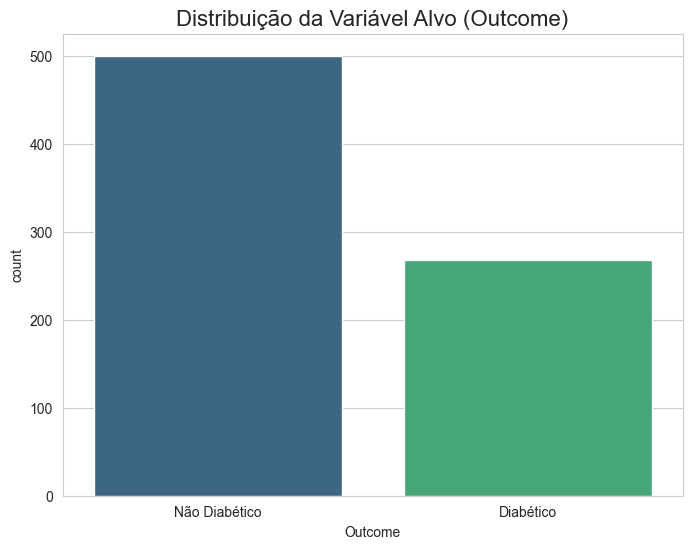

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df_imputed, palette='viridis')
plt.title('Distribuição da Variável Alvo (Outcome)', fontsize=16)
plt.xticks([0, 1], ['Não Diabético', 'Diabético'])
plt.show()
print(df_imputed['Outcome'].value_counts(normalize=True))

**⚖️ Balanceamento de Classes**

O dataset apresenta uma distribuição de aproximadamente **65% de não diabéticos** e **35% de diabéticos**. Apesar de não ser um desbalanceamento extremo, ele **pode impactar negativamente o desempenho de algoritmos de classificação**, especialmente aqueles que buscam maximizar a acurácia global.

**📌 Recomendação:**

Utilizar técnicas que considerem o desbalanceamento, como:

- Ajuste de pesos com `class_weight='balanced'` em modelos como `LogisticRegression` e `RandomForest`
- Técnicas de oversampling (ex: `SMOTE`) ou undersampling - Em poucas palavras, quando temos um conjunto de dados desequilibrado (com muito de uma categoria e pouco de outra), usamos técnicas para consertá-lo. O undersampling remove aleatoriamente exemplos da categoria maior para igualar as coisas, correndo o risco de perder informações importantes. Por outro lado, o oversampling, como o método SMOTE, cria novos dados sintéticos e realistas para a categoria menor, aumentando sua representatividade sem simplesmente copiar os dados existentes. Ambos os métodos visam equilibrar os dados para que os modelos de inteligência artificial possam aprender de forma mais justa e precisa, sem ignorar a categoria menos frequente.

### 4.2 Matriz de Correlação

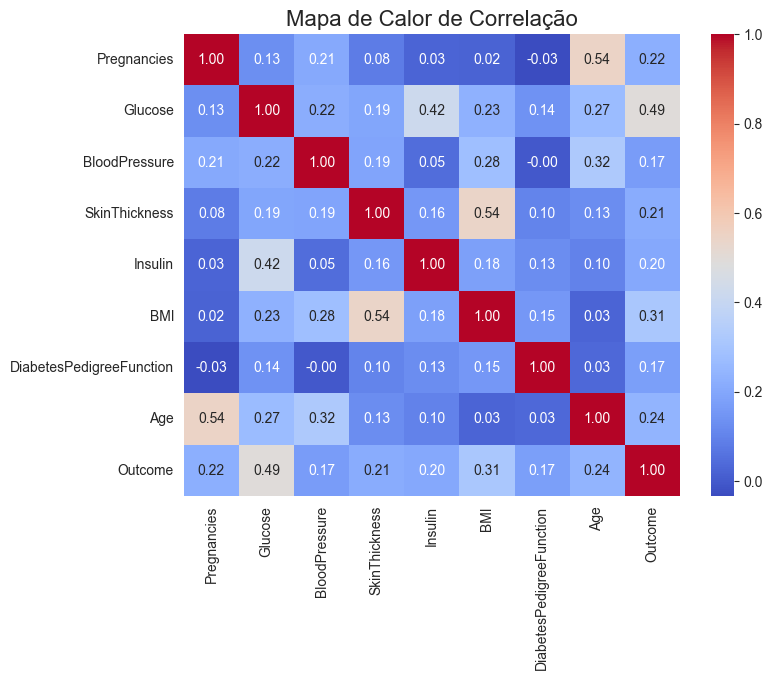

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação', fontsize=16)
plt.show()

**📈 Correlação com a Variável Alvo**

A matriz de correlação indica as seguintes variáveis com maior associação com o diagnóstico de diabetes (`Outcome`):

- `Glucose`: **0.49** — forte correlação positiva, o que é esperado dado o contexto clínico
- `BMI`: **0.31** — relação positiva indicando que maior IMC está associado à diabetes
- `Age`: **0.24** — tendência crescente de risco com o avanço da idade

Além disso, observamos que:

`Pregnancies` e `Age` apresentam correlação moderada entre si (**0.54**), o que pode refletir um efeito demográfico — mulheres com mais idade tendem a ter tido mais gestações.

**📈 Histograma para ver distribuição das variáveis graficamente**

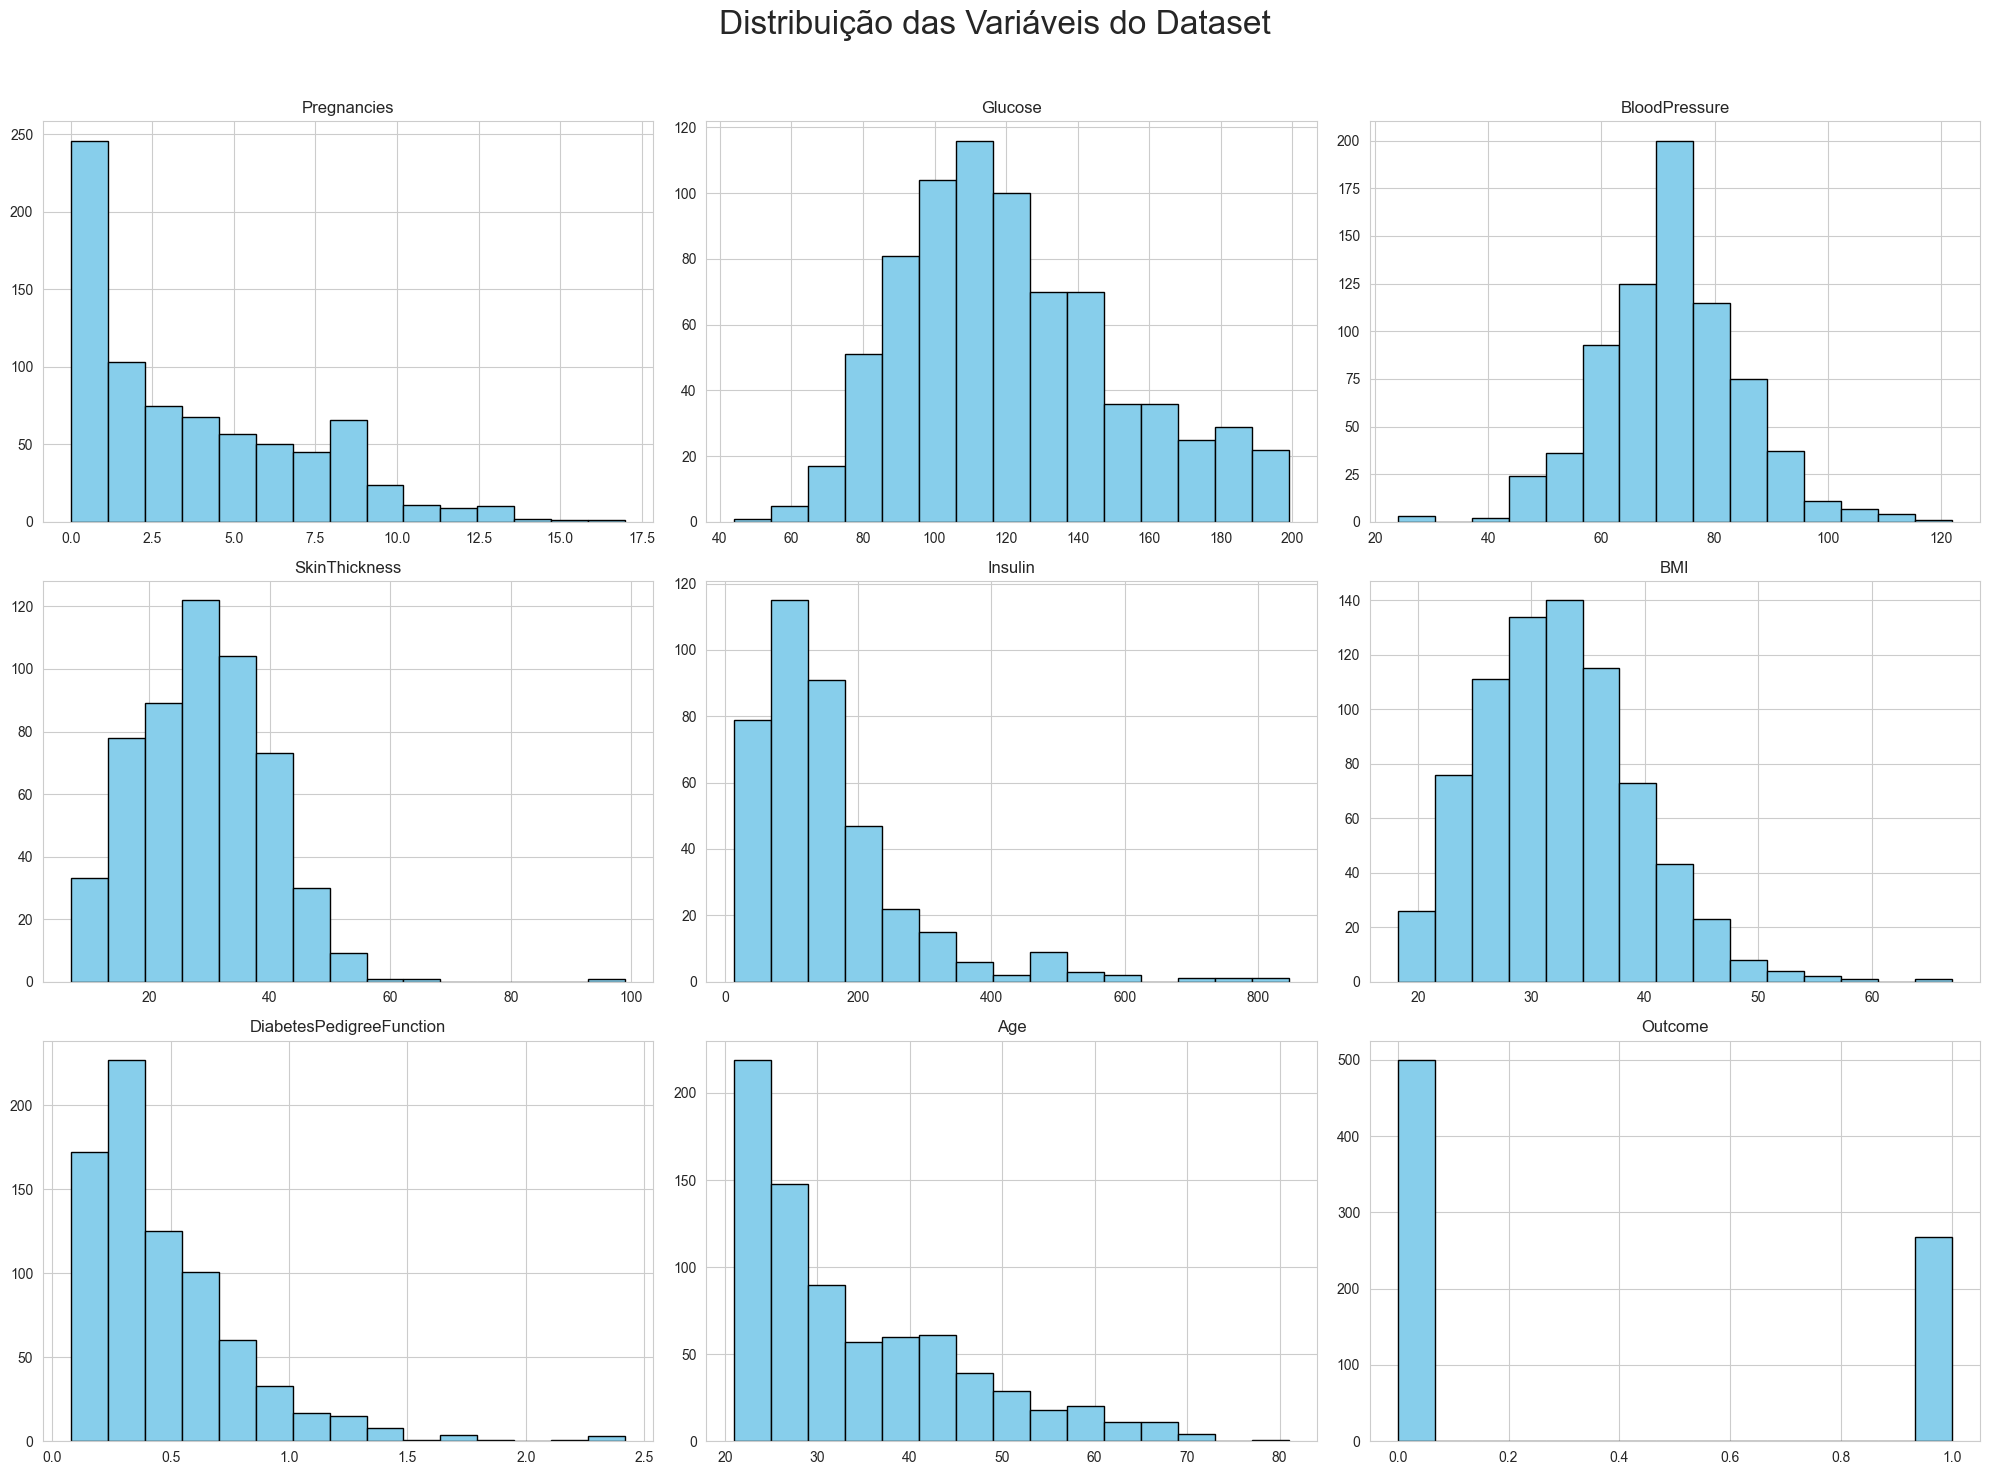

In [10]:
df.hist(figsize=(20, 15), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis do Dataset', size=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4.3 🔍 Análise Multivariada (Cruzamento de Variáveis)

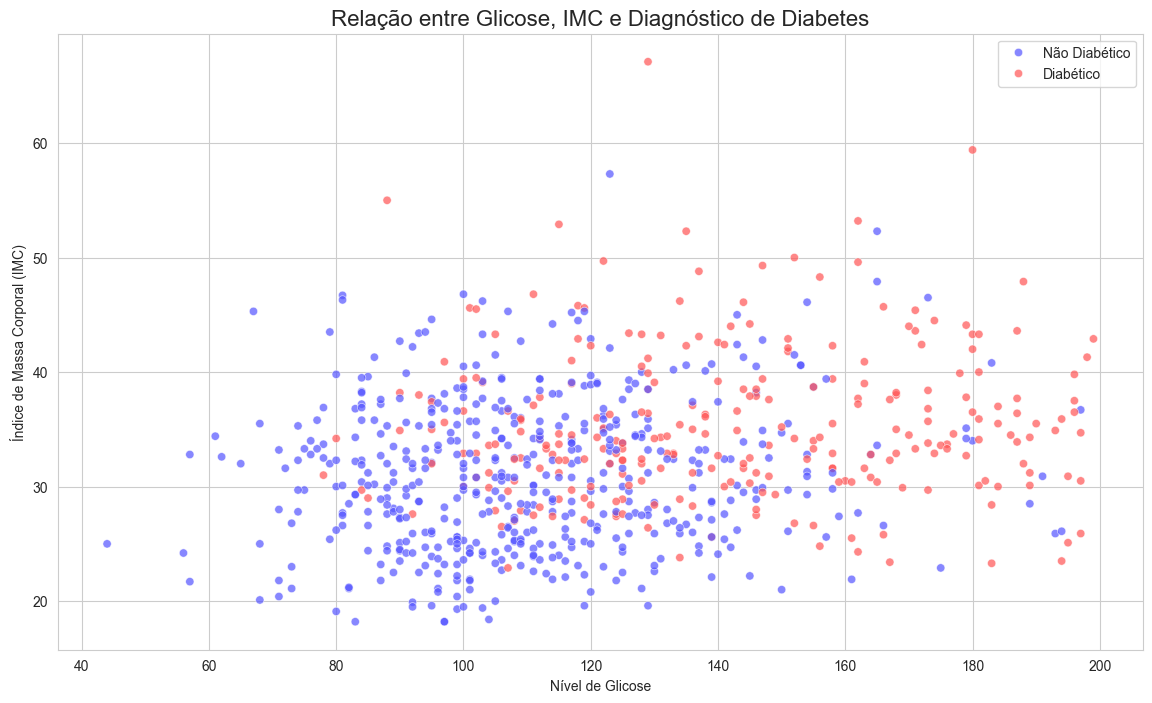

In [11]:
# Gráfico 1: Glicose vs. IMC, colorido pelo Diagnóstico
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_imputed, x='Glucose', y='BMI', hue='Outcome', palette='seismic', alpha=0.7)
plt.title('Relação entre Glicose, IMC e Diagnóstico de Diabetes', fontsize=16)
plt.xlabel('Nível de Glicose')
plt.ylabel('Índice de Massa Corporal (IMC)')
leg = plt.legend()
leg.get_texts()[0].set_text('Não Diabético')
leg.get_texts()[1].set_text('Diabético')
plt.show()

**📌 Análise do Gráfico 1: Glicose vs. IMC colorido por `Outcome`**

Este gráfico revela um padrão bastante claro:
- Pontos vermelhos (diabéticos) estão majoritariamente concentrados nas regiões de alta glicose e alto IMC
- Já os não diabéticos tendem a se concentrar em áreas de valores mais baixos dessas variáveis

**💡 Interpretação:**
A combinação de glicose elevada e IMC elevado é um forte indicador de risco de diabetes.
Apesar de haver alguma sobreposição entre as classes (o que é comum em dados reais), o padrão geral é bastante evidente.

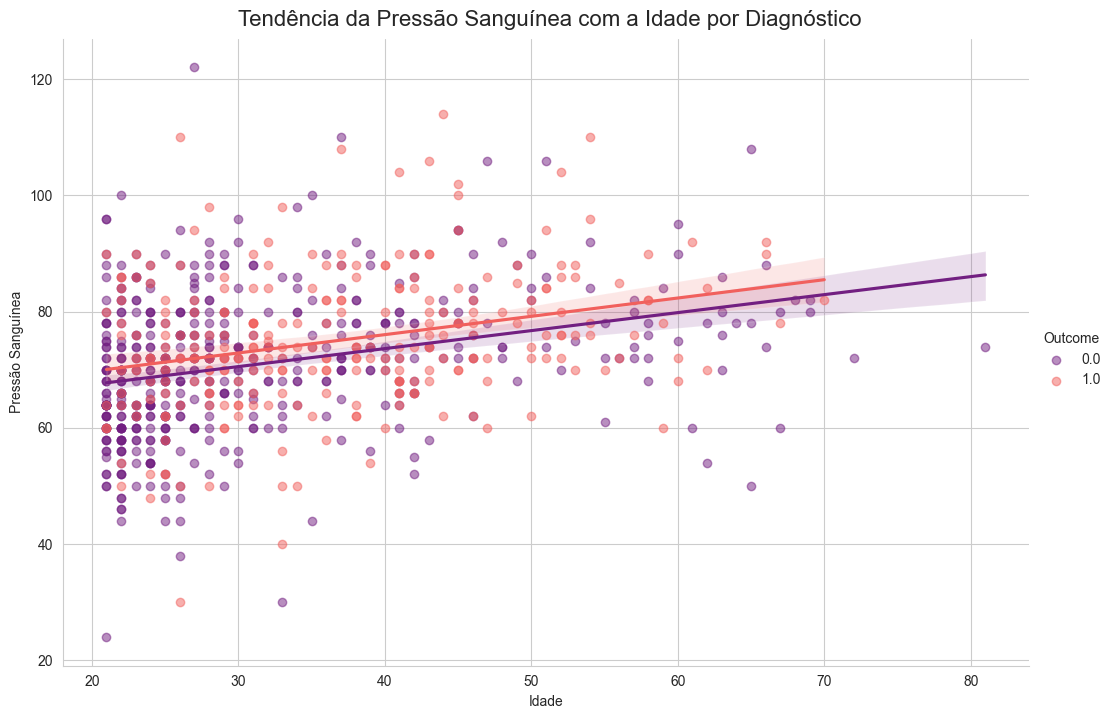

In [12]:
# Gráfico 2
g = sns.lmplot(data=df_imputed, x='Age', y='BloodPressure', hue='Outcome', 
    palette='magma', height=7, aspect=1.5,
    scatter_kws={'alpha':0.5})
g.fig.suptitle('Tendência da Pressão Sanguínea com a Idade por Diagnóstico', y=1.02, fontsize=16)
g.set_axis_labels("Idade", "Pressão Sanguínea")
plt.show()

**📌 Análise do Gráfico 2: Pressão Arterial vs. Idade, segmentado por `Outcome`**

Este gráfico analisa a relação entre idade e pressão arterial diastólica (`BloodPressure`), diferenciando os indivíduos diabéticos e não diabéticos por cores.

**🧭 Pontos-chave da análise:**
- Para **ambos os grupos**, há uma **tendência de aumento da pressão arterial com o avanço da idade**, como indicado pelas **linhas de regressão com inclinação positiva**.

- A **distribuição dos pontos para o grupo diabético (representado em roxo escuro)** tende a se concentrar **ligeiramente acima da média** dos não diabéticos em praticamente toda a faixa etária — especialmente a partir dos 40 anos.

**💡 Interpretação:**
Esse comportamento está em linha com evidências clínicas, que apontam que a hipertensão é um fator de risco comum e frequentemente associado à diabetes tipo 2. O gráfico sugere que indivíduos diabéticos, em geral, apresentam pressão arterial mais elevada, especialmente em idades mais avançadas.

**⚠️ Observação importante:**
A correlação entre `BloodPressure` e `Age` pode não ser forte isoladamente, mas a **interação entre essas variáveis pode carregar sinal preditivo** que deve ser explorado em modelos mais complexos ou na engenharia de variáveis (ex: criar uma feature combinada ou não linear).

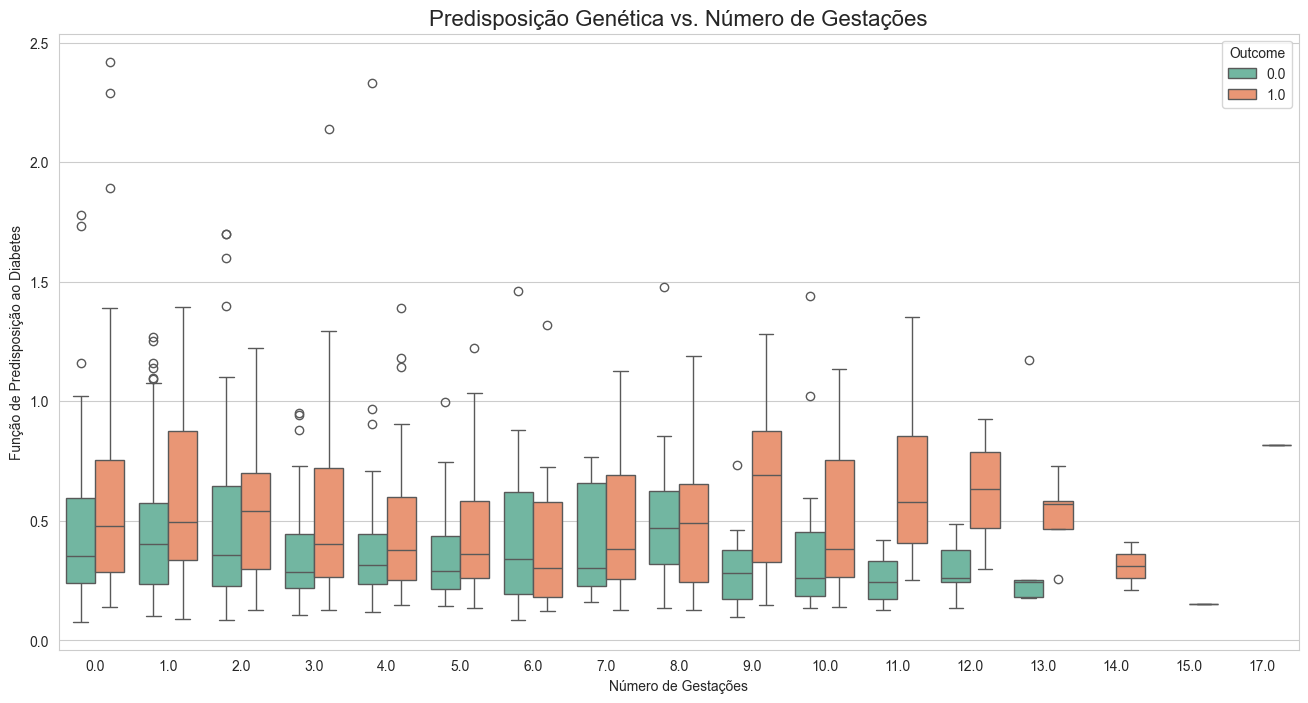

In [13]:
# Gráfico 3
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_imputed, x='Pregnancies', y='DiabetesPedigreeFunction', hue='Outcome', palette='Set2')
plt.title('Predisposição Genética vs. Número de Gestações', fontsize=16)
plt.xlabel('Número de Gestações')
plt.ylabel('Função de Predisposição ao Diabetes')
plt.show()

**📌 Análise do Gráfico 3:** `DiabetesPedigreeFunction` vs. `Pregnancies`, **segmentado por `Outcome`**
Este gráfico utiliza boxplots para representar a distribuição da variável DiabetesPedigreeFunction (medida de predisposição genética) ao longo dos diferentes valores de Pregnancies (número de gestações), separando os grupos diabéticos e não diabéticos.

**🧬 Contexto da variável:**
A `DiabetesPedigreeFunction` combina informações genéticas e familiares para estimar o grau de risco hereditário de desenvolver diabetes. Valores mais altos indicam maior predisposição genética.

**📊 Principais observações:**

- Para **quase todos os valores de `Pregnancies`**, a mediana da `DiabetesPedigreeFunction` é **visivelmente maior** no grupo diabético (representado pelas **caixas laranjas**), em comparação ao grupo não diabético (caixas azuis, por exemplo).
- Isso sugere que a **predisposição genética é um fator de risco significativo, independente do número de gestações**.

**💡 Interpretação:**
Este padrão reforça a ideia de que a **hereditariedade tem um papel importante no desenvolvimento do diabetes tipo 2**, e que esse fator de risco se manifesta consistentemente em diferentes subgrupos populacionais (ex: mulheres com diferentes históricos de gestações).

**⚠️ Relevância para modelagem:**
A variável `DiabetesPedigreeFunction`, embora frequentemente subestimada por ter distribuição assimétrica e valores baixos, **carrega sinal preditivo relevante** e deve ser mantida no conjunto de variáveis do modelo, especialmente em classificadores que conseguem capturar interações não lineares.

### Bônus - Análise detalhada utilizando Pandas Profiling

In [14]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Relatório de Análise de Diabetes")
# profile.to_notebook_iframe()
profile.to_file("./diabetes_report.html")

/Users/antoniorafael/workspace/Personal/ai/pos/tech-challenge/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 129.48it/s]


---

## 5. Pré-processamento Final e Modelagem

#### Divisão em treino e teste com estratificação

In [15]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### ⚙️ Normalização dos Dados (Padronização)

Antes de treinarmos nossos modelos, é essencial realizar o pré-processamento dos dados. Neste caso, adotamos a técnica de padronização, que é especialmente indicada quando usamos algoritmos sensíveis à escala dos dados, como Regressão Logística, SVM e Redes Neurais.


#### 🧠 Por que a padronização é necessária?

Nosso dataset contém variáveis com escalas muito diferentes:

- `Glucose` pode atingir valores acima de **150**
- `DiabetesPedigreeFunction` normalmente fica abaixo de **1.0**

Algoritmos baseados em distância (como KNN, SVM e PCA) ou métodos lineares (como regressão logística) **não sabem diferenciar entre escala e importância estatística**. Isso significa que **variáveis com maiores magnitudes numéricas podem dominar o processo de aprendizado**, mesmo que não sejam mais relevantes para a predição.

#### 💡 Consequência:
Sem padronização, o modelo pode:

- Convergir mais lentamente durante o treinamento
- Gerar coeficientes enviesados
- Subestimar variáveis com menor escala, mesmo que altamente preditivas

#### 🧪 O que significa padronizar?
A padronização transforma cada variável para que tenha:

- Média = 0
- Desvio padrão = 1

Ou seja, todas as variáveis passam a estar na mesma régua estatística, o que permite ao modelo tratá-las de forma justa.

#### 🧰 Como foi feito no código?

Utilizamos a classe StandardScaler da biblioteca Scikit-learn, que é o método padrão para padronização z-score:

```python
from sklearn.preprocessing import StandardScaler

# 1. Instanciamos o objeto
scaler = StandardScaler()

# 2. Ajustamos e transformamos os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# 3. Aplicamos a mesma transformação nos dados de teste
X_test_scaled = scaler.transform(X_test)
```

#### 🔍 Detalhes importantes:

- `fit_transform(X_train)`:
  - `fit`: o scaler aprende os parâmetros (média e desvio padrão) usando apenas os dados de treino
  - `transform`: aplica a transformação de fato
- `transform(X_test)`:
  - Apenas aplica a mesma transformação sem recalcular os parâmetros, garantindo que o modelo não "vaze informação" do teste para o treino (o famoso data leakage)

#### 📌 Boa prática:
Nunca use `.fit()` nos dados de teste! Isso invalida a avaliação do modelo, pois simula um cenário irreal em que você já conhecia os dados antes da previsão.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.1 🤖 Treinamento dos Modelos com Balanceamento de Classes

Com o pré-processamento concluído (valores inconsistentes tratados, variáveis padronizadas), estamos prontos para treinar nossos modelos.

O objetivo aqui é desenvolver **algoritmos capazes de aprender os padrões ocultos nos dados de treino (`X_train_scaled`)** e realizar **previsões confiáveis nos dados de teste (`X_test_scaled`)**, que simulam pacientes novos, fora da amostra.


#### ⚖️ **Por que balancear as classes?**

O dataset apresenta um desbalanceamento moderado:  
- **65% de pacientes não diabéticos (`Outcome = 0`)**  
- **35% de pacientes diabéticos (`Outcome = 1`)**

Embora esse desbalanceamento não seja extremo, ele **pode induzir o modelo a favorecer a classe majoritária**, levando a uma alta acurácia aparente, mas com baixa sensibilidade (recall) para a classe minoritária — justamente os pacientes diabéticos, que são os casos mais importantes de identificar corretamente.

💡 **Exemplo de risco:** Um modelo que prevê "não diabético" para todos os pacientes teria 65% de acurácia... e seria completamente inútil.


#### 🧰 **Solução adotada: `class_weight='balanced'`**

Ao definirmos `class_weight='balanced'` em modelos como `LogisticRegression`, `RandomForestClassifier` ou `SVC`, instruímos o algoritmo a:

- **Atribuir mais peso à classe minoritária (`1` – diabéticos)**
- **Reduzir o peso da classe majoritária (`0` – não diabéticos)**

Essa estratégia força o modelo a considerar ambas as classes de forma equilibrada durante o processo de aprendizado.

📌 **Benefícios:**
- Reduz viés para a classe dominante
- Melhora métricas como *recall* e *f1-score* da classe minoritária
- Dispensa a necessidade inicial de técnicas de oversampling ou undersampling

#### **5.1.1. Modelo 1: Regressão Logística**

In [17]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### **5.1.2. Modelo 2: Árvore de Decisão Balanceada**

In [18]:
# Árvore de Decisão Balanceada
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

## 6. Avaliação dos Modelos

### 📊 Avaliação dos Modelos: Métricas e Interpretações

Agora que ambos os modelos foram treinados e testados, vamos comparar seus resultados e discutir a escolha da métrica mais importante para o nosso problema.

Antes da comparação direta, é fundamental entender **o que significa cada métrica**. Isso garante que tomemos decisões com base em critérios corretos, especialmente em um contexto clínico como o de detecção de diabetes.


#### 🧱 A Base de Tudo: Matriz de Confusão

A matriz de confusão é uma tabela 2x2 que compara o valor **real** com o valor **previsto** pelo modelo.  
**Compreender essa estrutura é essencial para interpretar todas as métricas derivadas.**

|                            | **Previsto: Não Diabético** | **Previsto: Diabético** |
|----------------------------|-----------------------------|--------------------------|
| **Real: Não Diabético**    | **Verdadeiro Negativo (VN)**<br>*Acerto: não tinha, e o modelo disse que não tinha.* | **Falso Positivo (FP)**<br>*Erro: não tinha, mas o modelo disse que tinha.* (**Alarme Falso**) |
| **Real: Diabético**        | **Falso Negativo (FN)**<br>*Erro: tinha, mas o modelo disse que não tinha.* (**O Pior Erro!**) | **Verdadeiro Positivo (VP)**<br>*Acerto: tinha, e o modelo disse que tinha.* |



### 🔍 Métricas Derivadas da Matriz de Confusão

Abaixo, as principais métricas usadas para avaliar classificadores — especialmente em cenários de saúde, onde erros têm consequências sérias.



#### 🎯 **Acurácia (Accuracy)**

- **Fórmula:** `(VP + VN) / Total`
- **Tradução:** "De todas as previsões feitas, quantas estavam corretas?"
- ⚠️ **Atenção:** Pode ser enganosa em conjuntos de dados desbalanceados.
  - Exemplo: Se 90% dos pacientes são saudáveis, um modelo que sempre prevê "Saudável" terá 90% de acurácia — mas é inútil.


#### 🎯 **Precisão (Precision)**

- **Fórmula:** `VP / (VP + FP)`
- **Tradução:** "De todos os pacientes que o modelo previu como **Diabéticos**, quantos realmente eram?"
- **Importância:** Alta precisão é essencial quando **falsos positivos são problemáticos**, como em:
  - Cirurgias arriscadas
  - Exames caros ou invasivos


#### 🎯 **Recall (Sensibilidade ou Revocação)**

- **Fórmula:** `VP / (VP + FN)`
- **Tradução:** "De todos os **diabéticos reais**, quantos o modelo conseguiu identificar?"
- **Importância:** Alta sensibilidade é vital quando **falsos negativos são inaceitáveis**, como em:
  - Diagnóstico precoce de doenças
  - Triagem de pacientes


#### 🎯 **F1-Score**

- **Fórmula:** Média harmônica entre Precisão e Recall
- **Tradução:** Uma métrica que busca equilibrar os dois mundos
- **Quando usar:** Quando há desbalanceamento e **você se importa com precisão e recall ao mesmo tempo**


#### 🎯 **Support**

- **Definição:** Quantidade de amostras reais de cada classe nos dados de teste.
- **Importância:** Dá contexto às métricas — uma precisão de 90% com apenas 10 amostras (support=10) não é estatisticamente confiável.


#### 🎯 **AUC (Área Sob a Curva ROC)**

- **O que mede:** A habilidade geral do modelo de **diferenciar entre classes** em vários limiares de decisão.
- **Interpretação:**
  - `0.5`: Modelo aleatório
  - `1.0`: Classificador perfeito
- **Por que é útil:** Fornece uma **visão global do desempenho do modelo**, especialmente em dados desbalanceados.


### 🧾 Resumo Estratégico

- ✅ Use a **Matriz de Confusão** para entender os tipos de erro
- ✅ Cuidado com a **Acurácia** em datasets desbalanceados
- ✅ **Precision** é importante qua

#### **6.1. Modelo 1: Regressão Logística**

--- Resultados da Regressão Logística Balanceada ---
Acurácia: 0.7338
Recall: 0.7037
F1-Score: 0.6496

Relatório de Classificação:
               precision    recall  f1-score   support

Não Diabético       0.82      0.75      0.79       100
    Diabético       0.60      0.70      0.65        54

     accuracy                           0.73       154
    macro avg       0.71      0.73      0.72       154
 weighted avg       0.75      0.73      0.74       154



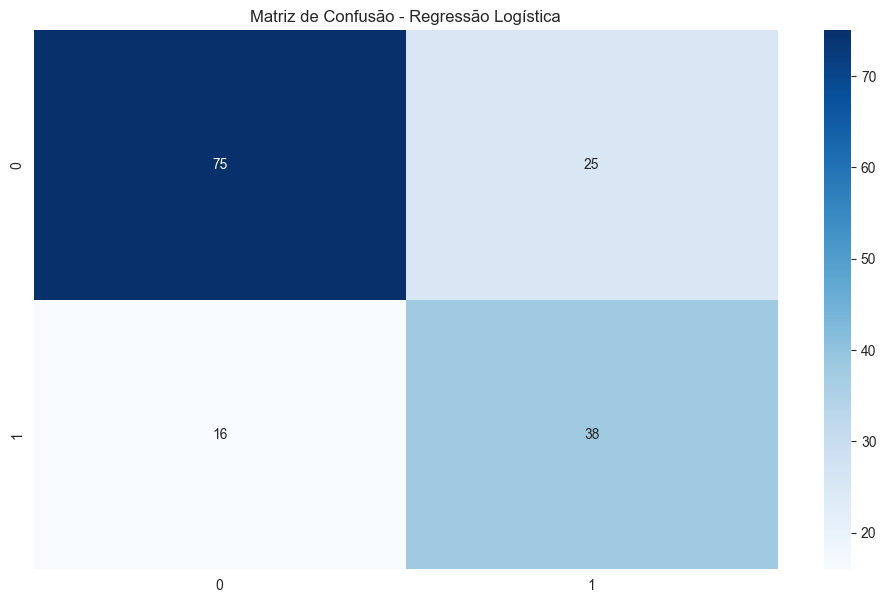

In [19]:
print("--- Resultados da Regressão Logística Balanceada ---")
y_pred_log = log_reg.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_log)
recall_lr = recall_score(y_test, y_pred_log)
f1_lr = f1_score(y_test, y_pred_log)

print(f"Acurácia: {accuracy_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log, target_names=['Não Diabético', 'Diabético']))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues').set_title('Matriz de Confusão - Regressão Logística')
plt.show()

#### 📋 Explicação das Métricas

A seguir, detalhamos as principais métricas obtidas após a avaliação do modelo. Cada uma delas fornece uma perspectiva diferente sobre a performance do classificador — e, juntas, permitem uma análise mais precisa e contextualizada.

### 🎯 **Precision (Precisão)**

Indica a proporção de previsões positivas que realmente eram corretas.

- **Classe 0 — Não Diabético (0.82):**  
  Quando o modelo previu que um paciente **não era diabético**, ele estava **certo em 82% dos casos**.  
  ✅ Alta precisão, ou seja, **poucos falsos positivos** para essa classe.

- **Classe 1 — Diabético (0.60):**  
  Quando o modelo previu que um paciente **era diabético**, ele acertou **60% das vezes**.  
  ⚠️ Isso significa que **40% dos casos foram falsos positivos** — pacientes saudáveis erroneamente classificados como doentes.  
  Esse valor ainda é aceitável em cenários de triagem, onde **é melhor gerar alguns alarmes falsos do que deixar de identificar um caso verdadeiro**.


### 🧠 **Recall (Sensibilidade / Revocação)**

Mede a capacidade do modelo de encontrar **todos os casos reais** de uma classe.

- **Classe 0 — Não Diabético (0.75):**  
  O modelo identificou corretamente **75% dos pacientes que realmente não eram diabéticos**.

- **Classe 1 — Diabético (0.70):**  
  O modelo conseguiu identificar **70% dos pacientes que realmente eram diabéticos**.  
  ✅ Este valor é especialmente importante no contexto do problema, pois **reflete a capacidade do modelo de detectar casos positivos reais**.  
  Um recall de 70% é considerado **muito bom para uma ferramenta de triagem clínica**, onde **deixar um doente passar despercebido é o pior cenário possível**.


### ⚖️ **F1-Score**

É a **média harmônica** entre precisão e recall — serve como uma métrica de equilíbrio.

- **Classe 1 — Diabético (F1 = 0.65):**  
  Indica um **bom compromisso entre identificar os doentes (recall)** e **evitar alarmes falsos (precisão)**.  
  ✅ Um F1-score acima de 0.60, especialmente em dados clínicos desbalanceados, já é considerado um desempenho relevante.


### 📈 **Accuracy (Acurácia Geral)**

- O modelo acertou a classificação (positiva ou negativa) de **73% de todos os pacientes** do conjunto de teste.
- ⚠️ Embora seja uma métrica intuitiva, ela deve ser analisada com cuidado, **pois pode mascarar problemas em datasets desbalanceados**.


### 🔢 **Support**

Mostra a quantidade de exemplos reais de cada classe no conjunto de teste:

- **Não Diabéticos:** 100 pacientes  
- **Diabéticos:** 54 pacientes

Essa informação é essencial para **avaliar a confiabilidade das métricas**. Por exemplo, uma alta precisão em uma classe com pouquíssimos exemplos pode ser estatisticamente frágil.


Essas métricas mostram que o modelo tem uma performance **consistente e equilibrada**, com bom desempenho na detecção de casos positivos — o que é especialmente desejável em um cenário de **triagem médica para diagnóstico de diabetes**.

#### **6.1. Modelo 2: Árvore de Decisão**


--- Resultados da Árvore de Decisão Balanceada ---
               precision    recall  f1-score   support

Não Diabético       0.79      0.79      0.79       100
    Diabético       0.61      0.61      0.61        54

     accuracy                           0.73       154
    macro avg       0.70      0.70      0.70       154
 weighted avg       0.73      0.73      0.73       154



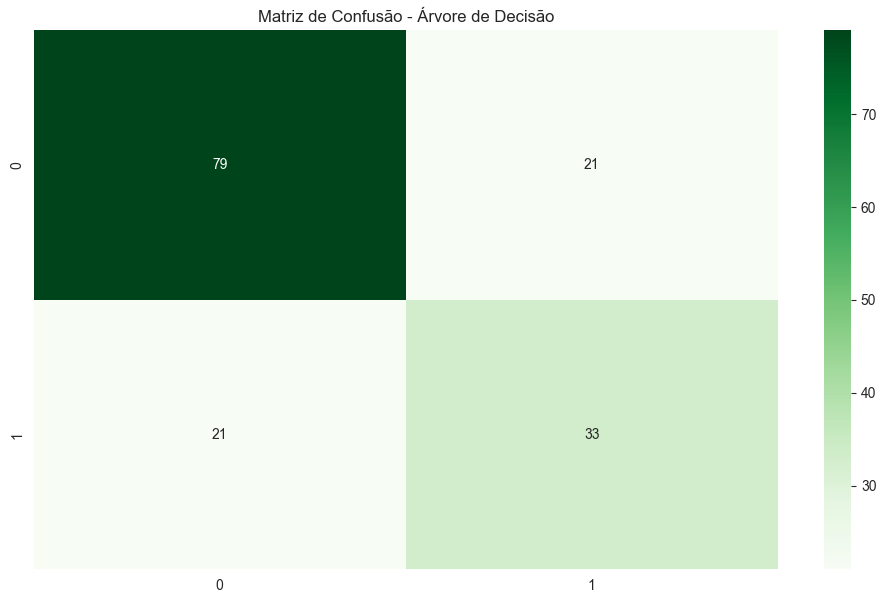

In [20]:
print("\n--- Resultados da Árvore de Decisão Balanceada ---")
y_pred_tree = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=['Não Diabético', 'Diabético']))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens').set_title('Matriz de Confusão - Árvore de Decisão')
plt.show()

#### 📋 Explicação das Métricas

Agora analisamos o desempenho de um segundo modelo (por exemplo, uma árvore de decisão ou random forest), comparando seus resultados com o modelo anterior (Regressão Logística). Embora ambos tenham a **mesma acurácia geral**, seu comportamento frente à classe **positiva (diabéticos)** é bastante distinto.


### 🎯 **Precision (Precisão)**

Indica a proporção de previsões positivas que estavam corretas.

- **Classe 0 — Não Diabético (0.79):**  
  Quando o modelo previu que um paciente **não era diabético**, ele acertou em **79% dos casos**.  
  ✅ Uma boa precisão, levemente inferior ao modelo anterior.

- **Classe 1 — Diabético (0.61):**  
  Quando o modelo previu que alguém era diabético, ele acertou **61% das vezes**.  
  ✅ Esse valor é **ligeiramente superior ao da Regressão Logística (60%)**, indicando que **gera menos falsos positivos**.



### 🧠 **Recall (Sensibilidade / Revocação)**

Mede a capacidade do modelo de **encontrar todos os casos reais** de uma classe.

- **Classe 0 — Não Diabético (0.79):**  
  O modelo identificou corretamente **79% dos pacientes saudáveis**.

- **Classe 1 — Diabético (0.61):**  
  O modelo conseguiu identificar **apenas 61% dos pacientes diabéticos** — o que representa uma **queda em relação à Regressão Logística (70%)**.  
  ⚠️ Isso significa que **mais paciente**


---

## 7. Interpretação e Conclusão

/var/folders/nk/cp6lbndd30d00l3q5f01ggyh0000gn/T/ipykernel_66723/3019178169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')


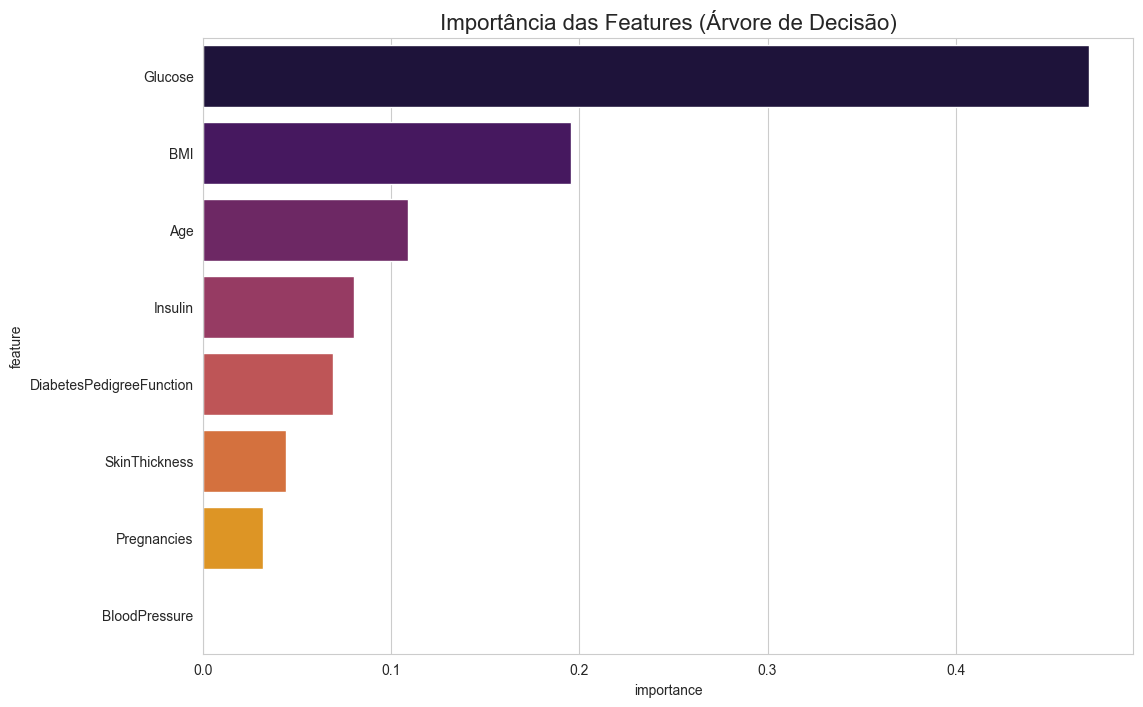

In [21]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='inferno')
plt.title('Importância das Features (Árvore de Decisão)', fontsize=16)
plt.show()

## ✅ Conclusão Final

### **📌 Principais Achados**

1. **🧼 Limpeza de Dados foi Crucial**  
   A substituição dos valores `0` por `NaN` e sua posterior imputação com a mediana foi **fundamental para corrigir distorções estatísticas e evitar viés no treinamento dos modelos**. Sem essa etapa, os algoritmos aprenderiam com dados fisiologicamente impossíveis.

2. **🔍 Fatores de Risco Confirmados**  
   A análise exploratória e a matriz de correlação confirmaram que as variáveis `Glucose`, `BMI` (Índice de Massa Corporal) e `Age` são os **principais preditores do diagnóstico de diabetes**, o que está em **pleno alinhamento com a literatura médica**. Isso valida tanto o dataset quanto as decisões de modelagem.

3. **⚖️ Balanceamento de Classes Funciona**  
   O uso de `class_weight='balanced'` permitiu que os modelos **tratassem a classe minoritária (Diabético) com mais atenção**, melhorando métricas como *recall* sem comprometer gravemente a precisão.  
   Essa abordagem foi **essencial para lidar com o desbalanceamento natural do dataset (65% vs 35%)**.


### 🩺 **Objetivo do Projeto: Recall Acima de Tudo**

Em um contexto de diagnóstico médico, **o recall da classe positiva é a métrica mais crítica**.  
⚠️ **Falsos negativos podem ter consequências graves**, enquanto falsos positivos geram apenas exames adicionais.

**🔑 Diretriz do projeto:**  
> "É preferível gerar um alarme falso do que deixar de identificar um paciente doente."


### 🧪 **Modelo Escolhido: Regressão Logística**

Apesar de ter uma precisão ligeiramente menor na classe "Diabético", a **Regressão Logística** apresentou:
- **Recall = 70%**, contra **61% da Árvore de Decisão**
- **F1-score superior**
- Comportamento mais consistente na detecção de casos positivos

✅ Isso a torna a **ferramenta mais segura e eficaz para triagem inicial de diabetes** entre os modelos testados neste projeto.


### 🛠️ Próximos Passos (Sugestões)

- Testar técnicas de **oversampling (ex: SMOTE)** para comparar com `class_weight`
- Avaliar modelos mais complexos como **XGBoost** e **LightGBM**
- Implementar validação cruzada estratificada para maior robustez
- Otimizar thresholds de decisão com base na curva ROC